<a href="https://colab.research.google.com/github/miftaadiwira16/Telco-Customer-Churn-Prediction-Using-Python/blob/main/Telco_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
## Created by Mifta Adiwira Jati Jaka

**Dataset Story**

Telco Customer Churn dataset has information about a telecommunication company that provided home phone, and Internet services to 7,043 Customers.

From the given description of this data set, some information are already known about the columns in our data set as such:

- Churn indicates the customers who left within the last month, which is our target variable.
- Services that customers have signed up for, which are phone service, multiple lines, internet, online security, online backup, device protection, tech support, TV streaming, and movie streaming.
- Customer account information, which are tenure, contract type, payment method, paperless billing, monthly charges, and total charges.
- Demographic info about customers, which are gender, if they are a senior citizen, and if they have partners and dependents.
- Customer usage behaviour, such as streaming TV and streaming movie.

### Table Columns Overview
  - CustomerId : customer id.
  - Gender : Gender.
  - SeniorCitizen : Whether the customer is old (1, 0).
  - Partner : Whether the customer has a partner (Yes, No).
  - Dependents : Whether the customer has dependents (Yes, No).
  - tenure : Number of months the customer has stayed with the company.
  - PhoneService : Whether the customer has telephone service (Yes, No).
  - MultipleLines : Whether the customer has more than one line (Yes, No, No phone service).
  - InternetService : Customer's internet service provider (DSL, Fiber optic, No).
  - OnlineSecurity : Whether the customer has online security (Yes, No, no Internet service).
  - OnlineBackup : Whether the customer has an online backup (Yes, No, no Internet service).
  - DeviceProtection : Whether the customer has device protection (Yes, No, no Internet service).
  - TechSupport : Whether the customer has technical support (Yes, No, no Internet service).
  - StreamingTV : Whether the customer has TV broadcast (Yes, No, no Internet service).
  - StreamingMovies : Whether the client is streaming movies (Yes, No, no Internet service).
  - Contract : Customer's contract duration (Month to month, One year, Two years).
  - PaperlessBilling : Whether the customer has a paperless invoice (Yes, No).
  - PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic)).
  - MonthlyCharges : The monthly amount charged to the customer.
  - TotalCharges : Total amount charged from customer.
  - Churn : Whether the customer is using (Yes or No).

### Import Library

In [2]:
# import library
import pandas as pd
import numpy as np
import datasist as ds
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/miftaadiwira16/datasets/main/Telco-Customer-Churn.csv', delimiter = ",")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the data information above, we can see: 
- There are 7043 rows and 21 columns.
- There are 3 datatypes which are 2 float64, 2 int64 and 18 object.
- There is no missing values / null values.


In [5]:
# Change datatype for TotalCharges column to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [6]:
# Check missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Fill missing value in column TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [8]:
# Check missing value again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Column TotalCharges datatypes has changed into float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Need data types adjusment for SeniorCitizen and Totalcharges column

In [10]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [11]:
df['TotalChargesCategories'] = df['TotalCharges'].apply(lambda x: 0 if x < 267.07 else (1 if x < 944.17 else (2 if x < 2048.95 else (3 if x < 4475.41 else 4))))
df['MonthlyChargesCategories'] = df['MonthlyCharges'].apply(lambda x: 0 if x < 21.1 else (1 if x < 50.4 else (2 if x < 70.35 else (3 if x < 83.9 else (4 if x < 96.1 else 5)))))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesCategories,MonthlyChargesCategories
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,3


In [12]:
# check duplicate values
df.duplicated().sum()

0

### Categorical Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
df1= df.copy()
cats = df1.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = LabelEncoder()
for i in cat_features:
  df1[i] = cat_en.fit_transform(df1[i])

df1['TotalCharges'] = pd.to_numeric(df1.TotalCharges, errors='coerce')
df1.drop('customerID', inplace=True, axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesCategories,MonthlyChargesCategories
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0,1
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2,2
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0,2
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,2,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0,3


In [14]:
df2 = df1.drop(['Churn'],axis=1)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7043 non-null   int64  
 1   SeniorCitizen             7043 non-null   int64  
 2   Partner                   7043 non-null   int64  
 3   Dependents                7043 non-null   int64  
 4   tenure                    7043 non-null   int64  
 5   PhoneService              7043 non-null   int64  
 6   MultipleLines             7043 non-null   int64  
 7   InternetService           7043 non-null   int64  
 8   OnlineSecurity            7043 non-null   int64  
 9   OnlineBackup              7043 non-null   int64  
 10  DeviceProtection          7043 non-null   int64  
 11  TechSupport               7043 non-null   int64  
 12  StreamingTV               7043 non-null   int64  
 13  StreamingMovies           7043 non-null   int64  
 14  Contract

### Exploratory Data Analysis

In [16]:
# summary statistics numeric column
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.000,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.000,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.000,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.000,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.000,1.000,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.000,1.000,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.000,1.000,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.000,1.000,2.00,2.00


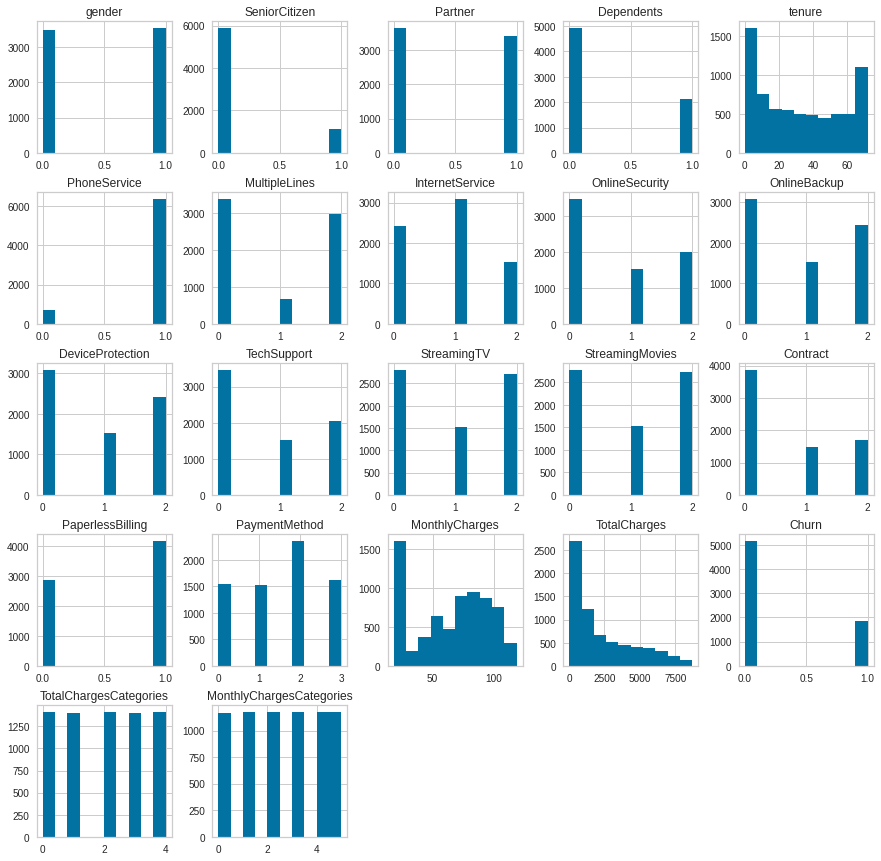

In [17]:
# check histogram for continuous columns
df1.hist(figsize=(15,15))
plt.show()

### Data Visualization

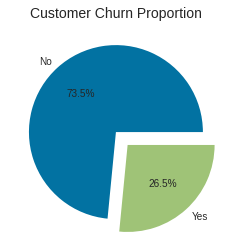

In [18]:
Churn_data = df.groupby(['Churn']).size()

y = Churn_data
mylabels = ["No", "Yes"]
myexplode = [0,0.2]

plt.title('Customer Churn Proportion', fontsize=14)
plt.pie(y, labels = mylabels,explode = myexplode,autopct='%.1f%%')
plt.show() 

It is found that 26.5% of the total customer are churn.

In [19]:
# See unique values and their counts for the columns in the dataset
ds.structdata.class_count(df)

Unique classes in customerID too large
Class Count for gender


,gender
Male,3555
Female,3488


Class Count for Partner


,Partner
No,3641
Yes,3402


Class Count for Dependents


,Dependents
No,4933
Yes,2110


Class Count for PhoneService


,PhoneService
Yes,6361
No,682


Class Count for MultipleLines


,MultipleLines
No,3390
Yes,2971
No phone service,682


Class Count for InternetService


,InternetService
Fiber optic,3096
DSL,2421
No,1526


Class Count for OnlineSecurity


,OnlineSecurity
No,3498
Yes,2019
No internet service,1526


Class Count for OnlineBackup


,OnlineBackup
No,3088
Yes,2429
No internet service,1526


Class Count for DeviceProtection


,DeviceProtection
No,3095
Yes,2422
No internet service,1526


Class Count for TechSupport


,TechSupport
No,3473
Yes,2044
No internet service,1526


Class Count for StreamingTV


,StreamingTV
No,2810
Yes,2707
No internet service,1526


Class Count for StreamingMovies


,StreamingMovies
No,2785
Yes,2732
No internet service,1526


Class Count for Contract


,Contract
Month-to-month,3875
Two year,1695
One year,1473


Class Count for PaperlessBilling


,PaperlessBilling
Yes,4171
No,2872


Class Count for PaymentMethod


,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


Class Count for Churn


,Churn
No,5174
Yes,1869


In [20]:
cats = [col for col in df.columns if (df[col].dtype == 'object') & (col not in ['customerID'])]
nums = [col for col in df.columns if df[col].dtype != 'object']

gender


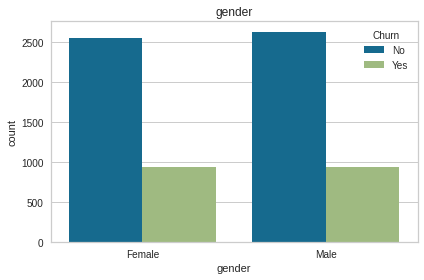

Partner


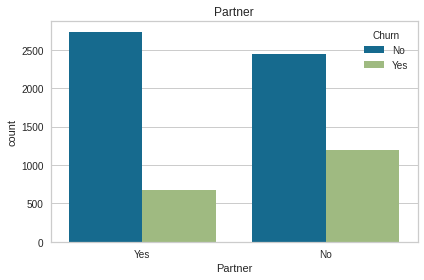

Dependents


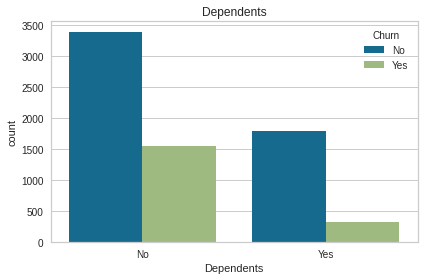

PhoneService


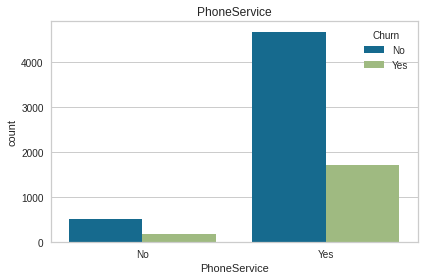

MultipleLines


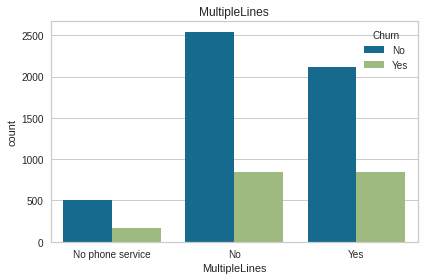

InternetService


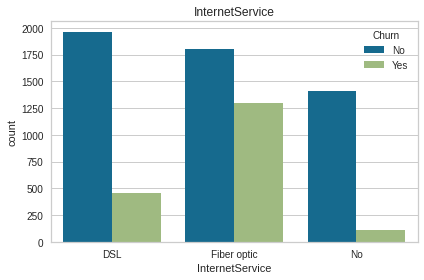

OnlineSecurity


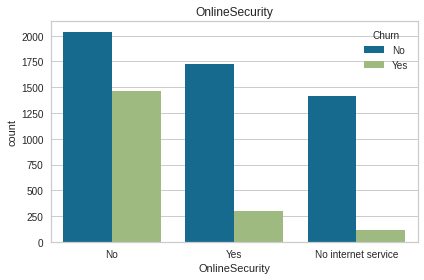

OnlineBackup


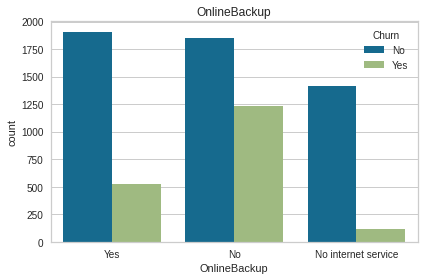

DeviceProtection


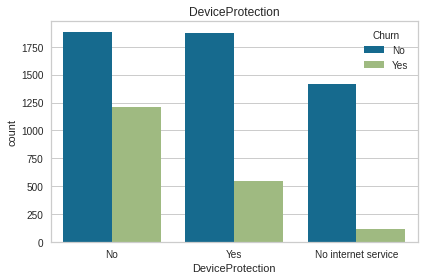

TechSupport


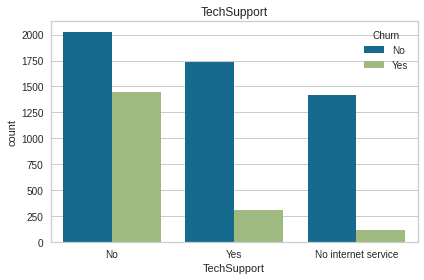

StreamingTV


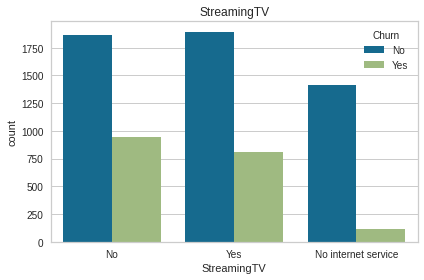

StreamingMovies


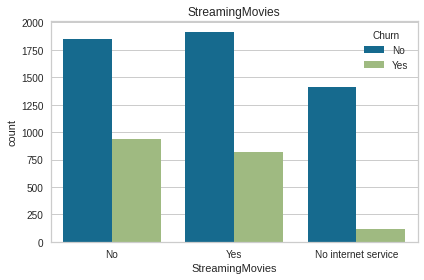

Contract


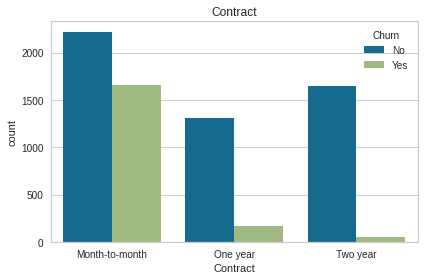

PaperlessBilling


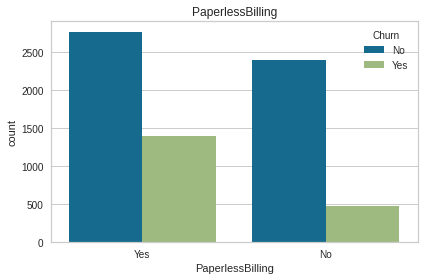

PaymentMethod


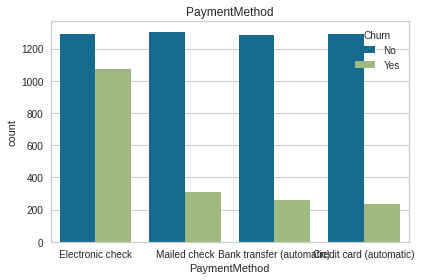

Churn


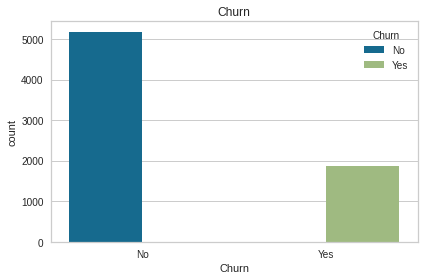

In [21]:
for col in cats:
    print(col)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(col)
    plt.tight_layout()
    plt.show()

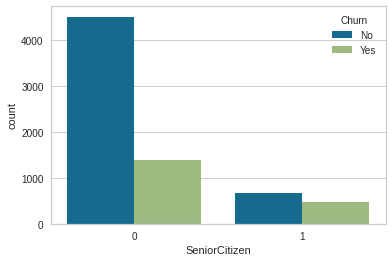

In [22]:
ax = sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

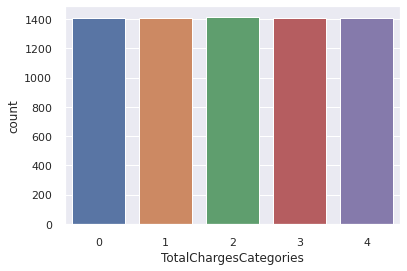

In [36]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="TotalChargesCategories", data=df)

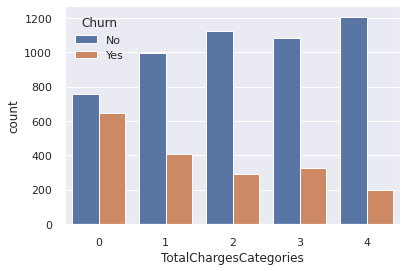

In [38]:
ax = sns.countplot(x="TotalChargesCategories", hue="Churn", data=df)

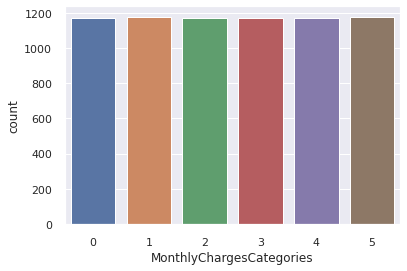

In [34]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="MonthlyChargesCategories", data=df)

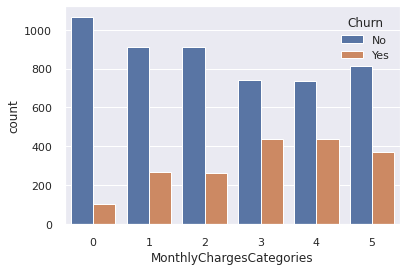

In [35]:
ax = sns.countplot(x="MonthlyChargesCategories", hue="Churn", data=df)

SeniorCitizen


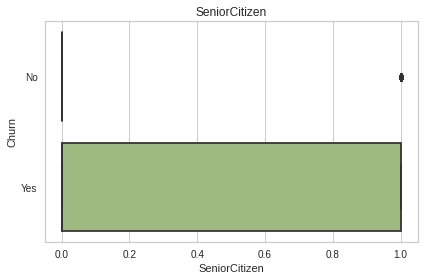

tenure


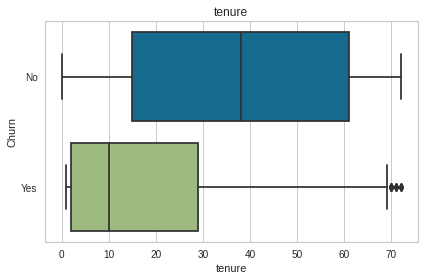

MonthlyCharges


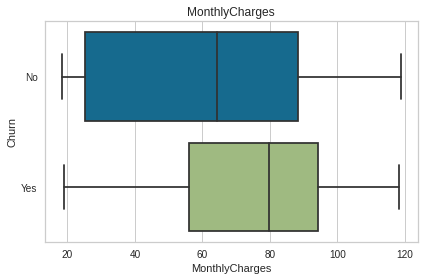

TotalCharges


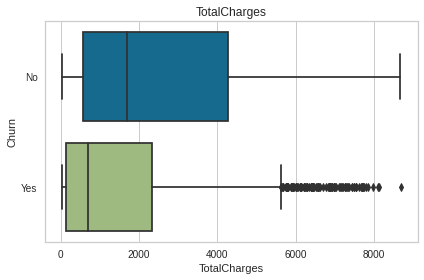

TotalChargesCategories


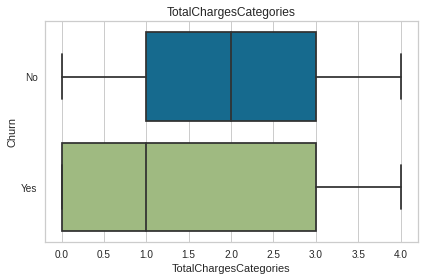

MonthlyChargesCategories


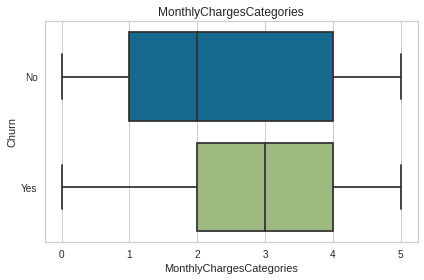

In [23]:
for col in nums:
    print(col)
    sns.boxplot(data=df, x=col, y='Churn')
    plt.title(col)
    plt.tight_layout()
    plt.show()

From Demographic of Telco Customer, we can see that:
- Gender: The customer gender are equally distributed between Male and Female customer. The composition of churn customer in both class is the same.
- Senior Citizen: The distribution of senior citizen is much lesser than the younger customer It’s only 16 2 of the total customer and they are more likely to churn.
- Partner: 48.3% of the total customers have no partner The half of them are churn.
- Dependents: Majority of the customer has dependents and the customer who has dependents are more likely to churn than the customer who hasn’t.

From Information Account of Telco Customer, we can see that:
- Tenure, Monthly and Total Charges: ‘The churners’ in average has lesser tenure time than the non-churners. Another insight is the churners has higher monthly charge than the non-churner.
- Contract: The customer who has month to month contract are more likely to churn than the others.
- Paperless Billing: The customer who has paperless billing also more
likely to churn.
- Payment Method: The customer with electronic check as the payment
method are more likely to churn.
- Total Charges: Customer who pay the monthly charges between 18.79 and 267.07 are most likely to churn compared with the people who pay more than that all the way up to 8684.8.
- Monthly Charges: Customer who pay the monthly charges between 70.35 and 118.75 are more likely to churn compared with the people who pay less.

From Usage Behaviour of Telco Customer, we can see that:
- Streaming TV and Movies: It is interesting to see that people who stream TV and stream Movies are more likely to churn This could mean that the customers who stream TV and movies are not satisfied with the telco company’s streaming service.

From Services of Telco Customer, we can see that:
- Tech Support, Device Protection, Online Security and Online Backup: The customer who are not signed up to these services are more likely to churn.
- Multiple Lines, Phone Service, Internet Service (Fiber Optic): The customer who signed up for these services are more likely to churn It indicates that these service need an improvement in order to reduce the churn rate.

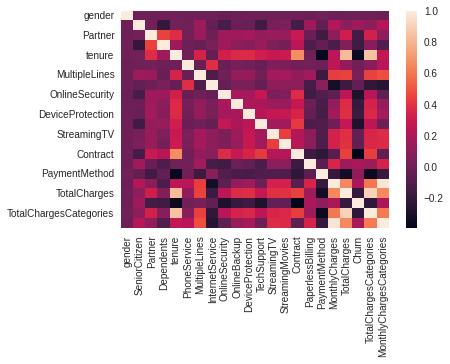

In [24]:
# heatmap
sns.heatmap(df1.corr())

From the heatmap, we could see that the features 'Contract' and 'Tenure' have a high correlation. It makes sense because these features measure the loyalty of the customer.

'StreamingTV', 'StreamingMovie', 'Multiple Lines' and 'Monthly Charges' have a high correlation with one another. It is because customers who stream movies are more likely to stream TV as well Their monthly charges tend to go up due to the large amount of data they use while watching movies or TV shows For customers who have multiples on their account, they would be more likely to pay more than a customer who has only a single line.

### Data Modelling and Evaluation

Let's start with Pycaret to evaluate every model that possible to be used!

In [26]:
# init setup
from pycaret.classification import *
clf1 = setup(data=df, ignore_features = ['customerID'], target = 'Churn', fix_imbalance = True, remove_outliers = True, feature_selection = True)

# compare models
best = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7510,0.8411,0.7954,0.5267,0.6332,0.4565,0.4793,0.714
ridge,Ridge Classifier,0.7506,0.0000,0.7875,0.5265,0.6306,0.4535,0.4750,0.045
lda,Linear Discriminant Analysis,0.7506,0.8404,0.7867,0.5265,0.6304,0.4533,0.4746,0.082
nb,Naive Bayes,0.7331,0.8234,0.7907,0.5046,0.6157,0.4263,0.4519,0.084
ada,Ada Boost Classifier,0.7816,0.8378,0.6421,0.5901,0.6128,0.4615,0.4641,0.433
gbc,Gradient Boosting Classifier,0.7922,0.8430,0.5995,0.6217,0.6085,0.4675,0.4690,1.408
lightgbm,Light Gradient Boosting Machine,0.7856,0.8305,0.5363,0.6225,0.5748,0.4328,0.4358,0.525
rf,Random Forest Classifier,0.7811,0.8172,0.5078,0.6174,0.5556,0.4126,0.4170,1.048
knn,K Neighbors Classifier,0.6976,0.7358,0.6587,0.4595,0.5407,0.3261,0.3384,0.276
et,Extra Trees Classifier,0.7704,0.7945,0.4968,0.5908,0.5377,0.3871,0.3907,0.993


From Pycaret result we got some good amounts of value from F 1 with Logistic Regression.

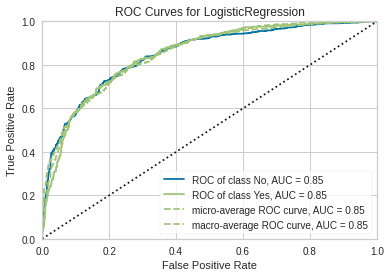

In [27]:
# creating a model
lr = create_model('lr')

# plot model
plot_model(lr, plot = 'auc')

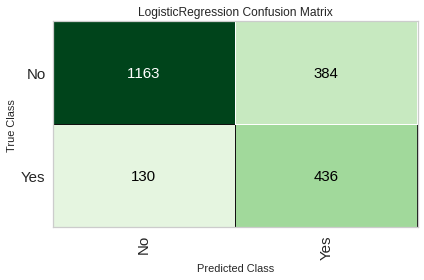

In [28]:
# plot model
plot_model(lr, plot = 'confusion_matrix')

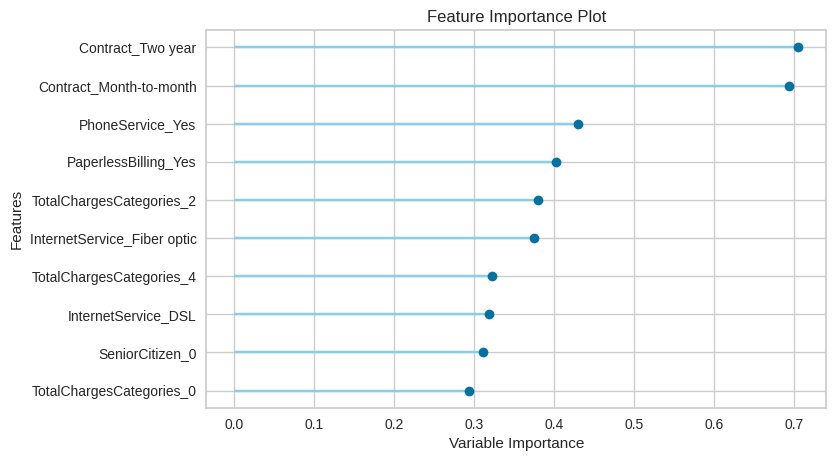

In [29]:
# plot model
plot_model(lr, plot = 'feature')

In [30]:
tuned_lr = tune_model(lr, n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7591,0.8622,0.8504,0.5347,0.6565,0.4854,0.5165
1,0.7143,0.8069,0.7717,0.4828,0.5939,0.3911,0.4167
2,0.7591,0.8411,0.8110,0.5365,0.6458,0.4745,0.4977
3,0.7607,0.8309,0.7698,0.5389,0.6340,0.4643,0.4806
4,0.7628,0.8430,0.7857,0.5410,0.6408,0.4726,0.4909
5,0.7799,0.8642,0.8571,0.5596,0.6771,0.5211,0.5484
6,0.7714,0.8328,0.7540,0.5556,0.6397,0.4779,0.4898
7,0.7308,0.8313,0.8189,0.5024,0.6228,0.4315,0.4627
8,0.7500,0.8464,0.8031,0.5258,0.6355,0.4576,0.4814


In [31]:
# default model
print(lr)

# tuned model
print(tuned_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6483, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=7.801, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6483, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Evaluate The Model: Logistic Regression

In [39]:
# create X and y. X for input variable, y for target class
df_X = df.drop(['customerID',	'Churn'],axis=1)
df_y = df[['Churn']]


# label encoding for y, change the value in y to 0 or 1.
# actually this is not needed because the value of y in the dataset is already 0 or 1
le = LabelEncoder()
df_y= le.fit_transform(df_y['Churn'])

# imputation, we fill in the empty value in the bmi column with the median value (or you can use another method)
df_X['TotalCharges'].fillna(df_X['TotalCharges'].median(), inplace=True)

# categorical encoding, change categorical value to numerical value
# you can use label encoding, ordinal or one hot encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

# save X and y into numpy arrays
X = df_X.astype(float).values
y = df_y.astype(float)

# hold-out method, divided into training and testing sets. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing is done.

Accuracy  0.808329389493611
Precision  0.7627068150418509
Recall  0.7285954271405705
Confusion matrix  [[1390  149]
 [ 256  318]]


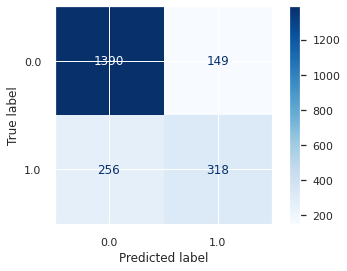

In [40]:
# start modeling using logistic regression, machine learning model from training set
model=LogisticRegression()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate model performance with accuracy, precision, recall, confusion matrix.
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

With Logistic Regression, we have:
- 0.80 accuracy.
- 0.76 Precision. 
- 0.72 Recall.
- 0.84 AUC value.

Before feature selection (4930, 21)
After feature selection (4930, 15)
Score of features [  1.28619871 115.58350684 108.73806337 134.87343401 665.31654668
   1.14191762   3.4682452   11.96454996 436.449029   191.12912541
 144.76666528 385.7866565   11.92374956   5.18978815 903.29148387
 183.76773727  51.77424034 181.33420613 193.90220712 246.52546916
 165.46514233]


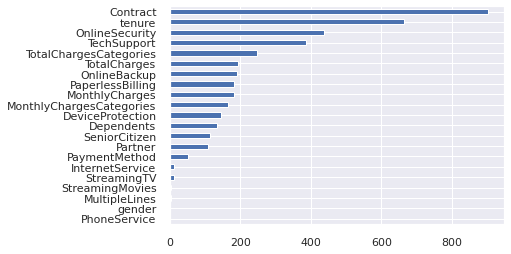

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

filter = SelectKBest(f_classif, k=15)
filter.fit(X_train, y_train)

X_train_filter = filter.transform(X_train)
X_test_filter = filter.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_filter.shape)

print("Score of features", filter.scores_)

feature_importance = pd.Series(filter.scores_, index=df2.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Optimize the model by choosing only 15 important features.

In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# modelling with logistic regression
model = LogisticRegression()
model.fit(X_train_filter, y_train)

# Evaluation
y_predict_train = model.predict(X_train_filter)
y_predict_test = model.predict(X_test_filter)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8004056795131845
Testing Accuracy: 0.8102224325603408
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1539
         1.0       0.68      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



Accuracy  0.808329389493611
Precision  0.7627068150418509
Recall  0.7285954271405705
Confusion matrix  [[1390  149]
 [ 256  318]]


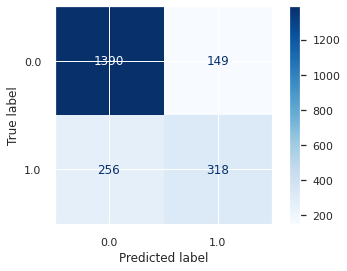

In [43]:
# start modeling using logistic regression, machine learning model from training set
model=LogisticRegression()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate model performance with accuracy, precision, recall, confusion matrix.
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

The accuracy increased to 0.81 Accuracy, 0.76 Precision, 0.73 Recall.

### Conclusion & Recommendation

From all the visualizations and analysis we have present, we can thus make the following recommendations for the decision maker:
- It is best to choose binomial logistic regression for a similar question since the logit model has the highest accuracy and indicates the feature importance. It is also easy to interpret and apply.
- For our current case, the best model logit model indicates that, if the company wants to keep the customers, it can do the following measures:
  - Target more on young and middle aged customers since they are more likely to adopt modern technology and have the budget to enjoy.
  - Offer more discount for the customers who decide to choose the one year or two year contract so that more customers will be bound with the contract.
  - Consider an overall discount since the price is always one of the major factors for customers to choose among existing incumbents.